Multinominal Logistic Regression

In [95]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [96]:
#penguins data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

#need to prep data

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [97]:
#dropping columns: studyName, Individual ID, Date Egg, Sample Number
pdata = penguins.drop(['studyName', 'Individual ID', 'Date Egg', 'Sample Number', 'Comments'], axis = 1)
pdata.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


In [98]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [99]:
#drop nan values
data = pdata.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Region               325 non-null    object 
 2   Island               325 non-null    object 
 3   Stage                325 non-null    object 
 4   Clutch Completion    325 non-null    object 
 5   Culmen Length (mm)   325 non-null    float64
 6   Culmen Depth (mm)    325 non-null    float64
 7   Flipper Length (mm)  325 non-null    float64
 8   Body Mass (g)        325 non-null    float64
 9   Sex                  325 non-null    object 
 10  Delta 15 N (o/oo)    325 non-null    float64
 11  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), object(6)
memory usage: 33.0+ KB


In [100]:
data.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799


'''
just wanted to see what this does
'''
for index, row in data.iterrows():
    print("row : " + str(row))
    print("index : " + str(index))
    
for col in data:
    print(data[col])

In [101]:
myData = data
myData

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",No,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538
340,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [102]:
#transforming cols that are not floats and ints
le = preprocessing.LabelEncoder()

#species 
myData['Species'] = le.fit_transform(myData['Species'])
#regions
myData['Region'] = le.fit_transform(myData['Region'])
#island
myData['Island'] = le.fit_transform(myData['Island'])
#stage
myData['Stage'] = le.fit_transform(myData['Stage'])
#clutch competition
myData['Clutch Completion'] = le.fit_transform(myData['Clutch Completion'])
#sex
myData['Sex'] = le.fit_transform(myData['Sex'])

<ipython-input-102-15e984122d48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['Species'] = le.fit_transform(myData['Species'])
<ipython-input-102-15e984122d48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['Region'] = le.fit_transform(myData['Region'])
<ipython-input-102-15e984122d48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

penguins = penguins.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments', 'Region'], axis = 1)
penguins = penguins.dropna()

penguins["Species"] = penguins["Species"].str.split().str.get(0)

recode1 = {"MALE"  : 0, "FEMALE" : 1, "." : 2}
penguins["Sex"] = penguins["Sex"].map(recode1)

recode2 = {'Biscoe'  : 0, 'Dream' : 1, 'Torgersen'  : 3}
penguins["Island"] = penguins["Island"].map(recode2)


In [103]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [63]:
myData

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,0,2,0,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454
2,0,0,2,0,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302
4,0,0,2,0,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426
5,0,0,2,0,1,39.3,20.6,190.0,3650.0,2,8.66496,-25.29805
6,0,0,2,0,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...,...
338,2,0,0,0,0,47.2,13.7,214.0,4925.0,1,7.99184,-26.20538
340,2,0,0,0,1,46.8,14.3,215.0,4850.0,1,8.41151,-26.13832
341,2,0,0,0,1,50.4,15.7,222.0,5750.0,2,8.30166,-26.04117
342,2,0,0,0,1,45.2,14.8,212.0,5200.0,1,8.24246,-26.11969


In [104]:
x_slice = myData[['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
y_slice = myData[['Species']]

In [71]:
x_slice

,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,0,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454
2,0,2,0,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302
4,0,2,0,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426
5,0,2,0,1,39.3,20.6,190.0,3650.0,2,8.66496,-25.29805
6,0,2,0,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...
338,0,0,0,0,47.2,13.7,214.0,4925.0,1,7.99184,-26.20538
340,0,0,0,1,46.8,14.3,215.0,4850.0,1,8.41151,-26.13832
341,0,0,0,1,50.4,15.7,222.0,5750.0,2,8.30166,-26.04117
342,0,0,0,1,45.2,14.8,212.0,5200.0,1,8.24246,-26.11969


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_slice, y_slice, test_size = 0.2)

In [ ]:
myData[['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

In [73]:
combos = [
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)'],
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
    ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)'],
    ['Region', 'Island', 'Stage', 'Clutch Completion'],
]

In [74]:
def test_cols(cols):
    print("testing: " + str(cols))
    LR = LogisticRegression()
    LR.fit(x_train[cols], y_train)
    return LR.score(x_test[cols], y_test)

In [78]:
num_col = []
num_score = []

In [79]:
for cols in combos: 
    z = test_cols(cols)
    num_col.append(len(cols))
    num_score.append(z)
    print("test score is " + str(np.round(z, 5)))

testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
test score is 1.0
testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)']
test score is 1.0
testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']
test score is 1.0
testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
test score is 1.0
testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']
test score is 1.0
testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)']


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

test score is 0.98462
testing: ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)']
test score is 0.98462
testing: ['Region', 'Island', 'Stage', 'Clutch Completion']
test score is 0.56923


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

In [80]:
num_col

[11, 10, 9, 8, 7, 6, 5, 4]

In [82]:
num_score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9846153846153847,
 0.9846153846153847,
 0.5692307692307692]

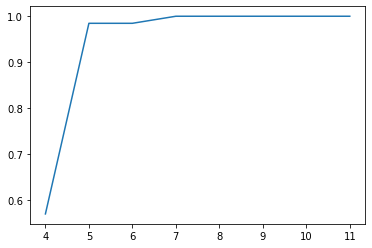

In [83]:
plt.plot(num_col, num_score)